In [1]:
%pylab inline
from skimage import data,color,filters,morphology,feature,draw,transform,util

Populating the interactive namespace from numpy and matplotlib


## Filtrowanie szumu

Zrób zdjęcie zawierające szum typu salt/pepper i zastosuj na nim filtry uśredniający, gaussowski i medianowy z modułu *skimage.filters*.

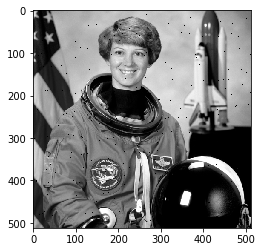

In [11]:
i = data.astronaut()
i = color.rgb2gray(i)

N=1000
x=random.randint(0,i.shape[0],N)
y=random.randint(0,i.shape[1],N)
i[x,y] = 0
# or
# i[x,y] = 1

imshow(i, cmap=cm.gray)
figure()

/usr/local/lib/python3.4/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Text(0.5,1,'Median')

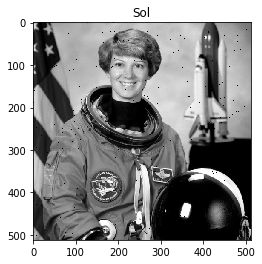

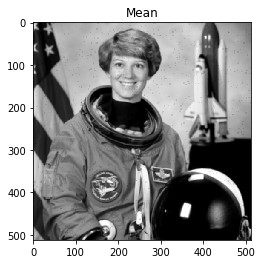

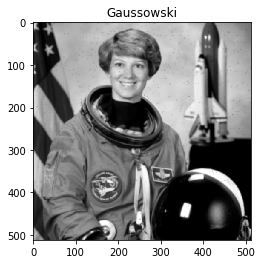

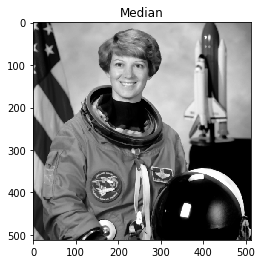

In [10]:


imshow(i,cmap=cm.gray)
title("Sol")

figure()

j = filters.rank.mean(i,morphology.rectangle(3,3))
imshow(j,cmap=cm.gray)
title("Mean")
#Usredniajace
    
figure()

j = filters.gaussian(i,sigma=1)
imshow(j,cmap=cm.gray)
title("Gaussowski")

figure()

j = filters.median(i,morphology.rectangle(3,3))
imshow(j,cmap=cm.gray)
title("Median")

## Dylacja, erozja, zamknięcie i otwarcie

Dokonaj operacji dylacji, erozji, otwarcia i zamknięcia na tym samym zdjęciu co powyżej, w filtrze medianowym. Jakie operacje się nadają do jakiego rodzaju szumu?

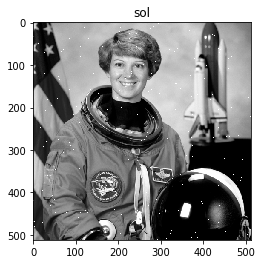

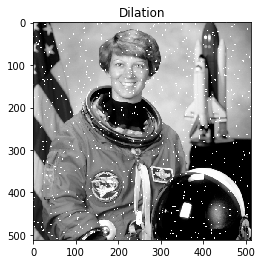

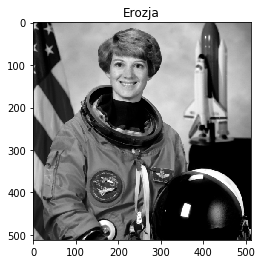

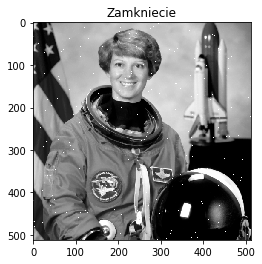

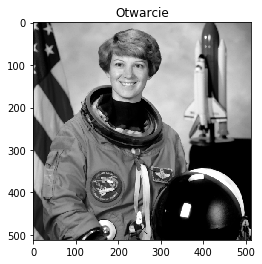

In [15]:
i = data.astronaut()
i = color.rgb2gray(i)

N=1000
x=random.randint(0,i.shape[0],N)
y=random.randint(0,i.shape[1],N)
i[x,y] = 1
# or
# i[x,y] = 0

imshow(i, cmap=cm.gray)
title("sol")
figure()

j = morphology.dilation(i)
imshow(j, cmap=cm.gray)
title("Dilation")
figure()

j = morphology.erosion(i)
imshow(j, cmap=cm.gray)
title("Erozja")
figure()

j = morphology.closing(i)
imshow(j, cmap=cm.gray)
title("Zamkniecie")
figure()

j = morphology.opening(i)
imshow(j, cmap=cm.gray)
title("Otwarcie")
figure()



## Detekcja elementów morfologicznych - transformata Hough'a

Po dokonaniu binaryzacji zdjęć, możemy zaczać szukać pozytecznych informacji w rastrze. Istnieje na to wiele metod, ale tutaj omówimy pewną ciekawą metodę znaną jako transformatę Hough'a.

Użyj transforamty Hough'a żeby odnaleźć linie występujące w krawędziach zdjęcia *data.camera* (użyj transformaty Canny'ego do otrzymania krawędzi). Do tranformacji zdjęcia do przestrzeni Hough'a użyj metody *skimage.transform.hough_line*. Do wyboru największych przecięć można użyć *skimage.transform.hough_line_peaks*. Wygodniej jednak będzie zastosować *skimage.transform.probabilistic_hough_line* do policzenia współrzędnych linii na obrazie. Użyj parametrów *threshold=10*, *line_length=5* oraz *line_gap=3*. Pokesperymentuyj z nimi żeby znaleźć inne rozwiązania.

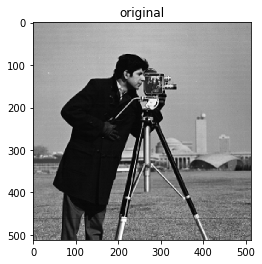

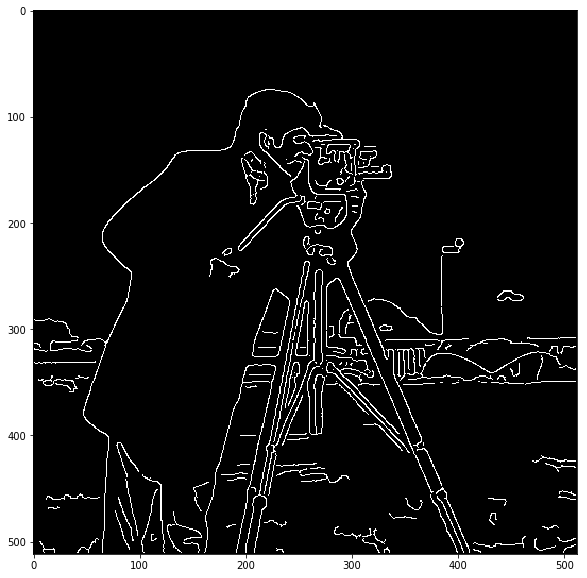

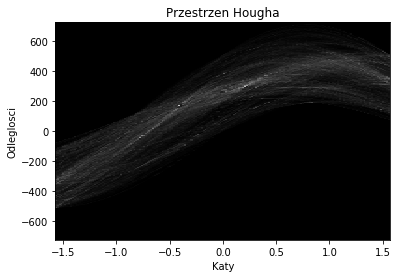

In [25]:
i = data.camera()
imshow(i, cmap=cm.gray)
title("original")

e = feature.canny(i, sigma=2)
figure(figsize=(10,10))
imshow(e, cmap=cm.gray)

h,w,d = transform.hough_line(e)
figure()
pcolormesh(w,d,h,cmap=cm.gray)
_=xlabel("Katy")
_=ylabel("Odleglosci")
_=title("Przestrzen Hougha")



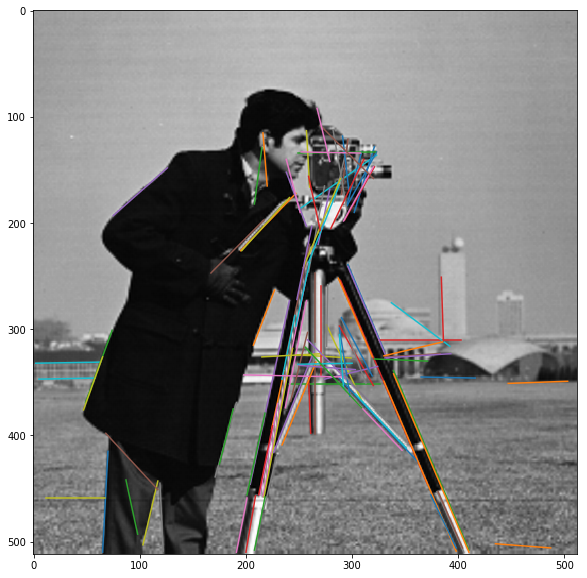

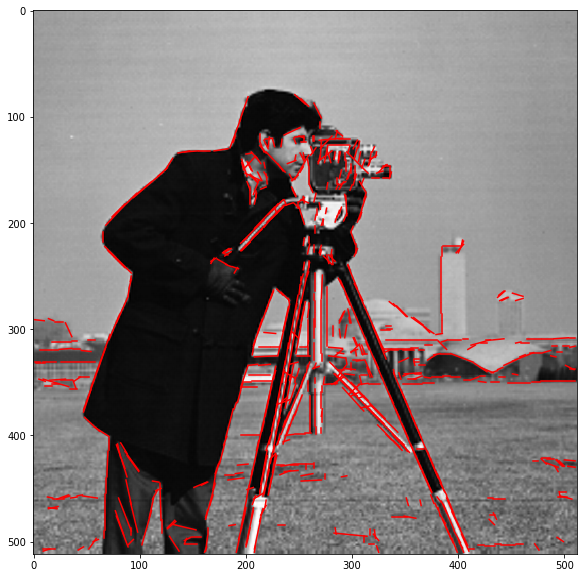

In [35]:
# transform.hough_line_peaks?
# transform.probabilistic_hough_line?

figure(figsize=(10,10))
imshow(i,cmap=cm.gray)

lines = transform.probabilistic_hough_line(e)
lines = array(lines)
for l in lines:
    plot(l.T[0], l.T[1])
#     plot(l.T[0], l.T[1],'r') #red color


figure(figsize=(10,10))
imshow(i,cmap=cm.gray)
lines = transform.probabilistic_hough_line(e,line_length=5, line_gap=3,threshold=1)
lines = array(lines)
for l in lines:
    plot(l.T[0], l.T[1],'r')

# Praca domowa

Użyj transformaty Hougha do detekcji kół i elips (metoda *hough_circle*) na zdjęciu *data.coins*.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
 
from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

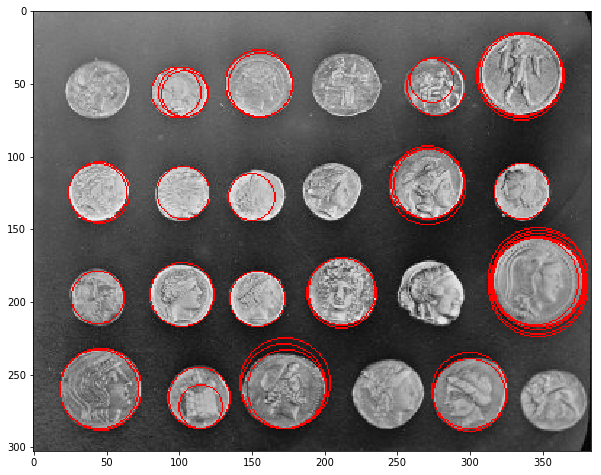

In [37]:

 
# Load picture and detect edges
image = img_as_ubyte(data.coins())
edges = feature.canny(image, sigma=3, low_threshold=0, high_threshold=50)
 
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
 
# Detect two radii
hough_radii = np.arange(15, 35, 1)
hough_res = hough_circle(edges, hough_radii)
 
centers = []
accums = []
radii = []
 
for radius, h in zip(hough_radii, hough_res):
    peaks = peak_local_max(h, num_peaks=2)
    centers.extend(peaks)
    accums.extend(h[peaks[:, 0], peaks[:, 1]])
    radii.extend([radius, radius])
 
# Draw circles
image = color.gray2rgb(image)
for idx in np.argsort(accums)[::-1][:]:
    center_x, center_y = centers[idx]
    radius = radii[idx]
    cx, cy = circle_perimeter(center_y, center_x, radius)
    image[cy, cx] = (255, 0, 0)
 
ax.imshow(image, cmap=plt.cm.gray)